<a href="https://colab.research.google.com/github/icardemil64/IA_CONTROL_DL/blob/main/IMDB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar librería

In [1]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
print("Tensorflow: " + tf.__version__)

Tensorflow: 2.5.0


#Importar datos

In [2]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [3]:
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [4]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [5]:
decode_review = ' '.join(
    [reverse_word_index.get(i - 3,'?') for i in train_data[0]]
)
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

#Preprocesado de datos

In [6]:
def vectorize(seq, dim = 10000):
  results = np.zeros((len(seq), dim))
  for i, seq in enumerate(seq):
    results[i,seq] = 1
  return results

In [7]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#Crear modelo

In [9]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
x_val = x_train[:10000]
x_trn = x_train[10000:]
y_val = y_train[:10000]
y_trn = y_train[10000:]

In [34]:
history = model.fit(x_trn,y_trn,epochs=10,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/10
30/30 [==============================] - 19s 112ms/step - loss: 0.6301 - accuracy: 0.6672 - val_loss: 0.4036 - val_accuracy: 0.8579
Epoch 2/10
30/30 [==============================] - 1s 31ms/step - loss: 0.3282 - accuracy: 0.8906 - val_loss: 0.2935 - val_accuracy: 0.8885
Epoch 3/10
30/30 [==============================] - 1s 31ms/step - loss: 0.2097 - accuracy: 0.9298 - val_loss: 0.2755 - val_accuracy: 0.8901
Epoch 4/10
30/30 [==============================] - 1s 31ms/step - loss: 0.1485 - accuracy: 0.9559 - val_loss: 0.2823 - val_accuracy: 0.8874
Epoch 5/10
30/30 [==============================] - 1s 31ms/step - loss: 0.1099 - accuracy: 0.9707 - val_loss: 0.3007 - val_accuracy: 0.8844
Epoch 6/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0830 - accuracy: 0.9805 - val_loss: 0.3255 - val_accuracy: 0.8817
Epoch 7/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0622 - accuracy: 0.9885 - val_loss: 0.3545 - val_accuracy: 0.8802
Epoch 8/10


In [36]:
result = model.evaluate(x_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.4900 - accuracy: 0.8611


In [35]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

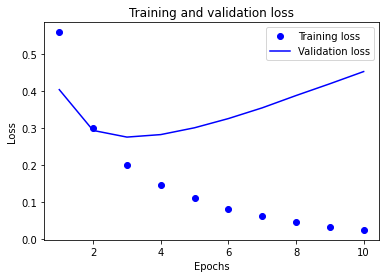

In [37]:
import matplotlib.pyplot as plt

plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

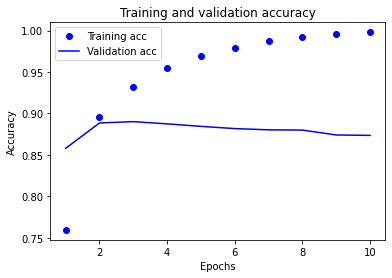

In [38]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, (len(history_dict['accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Early Stopping

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
es = EarlyStopping(monitor='val_loss', mode='min', patience = 3, verbose=1)

In [16]:
history_otra = model.fit(x_trn,y_trn,epochs=10,batch_size=512,validation_data=(x_val,y_val),callbacks=[es])

Epoch 1/10
30/30 [==============================] - 16s 58ms/step - loss: 0.6661 - accuracy: 0.6354 - val_loss: 0.5065 - val_accuracy: 0.8462
Epoch 2/10
30/30 [==============================] - 1s 34ms/step - loss: 0.4347 - accuracy: 0.8734 - val_loss: 0.3368 - val_accuracy: 0.8772
Epoch 3/10
30/30 [==============================] - 1s 34ms/step - loss: 0.2628 - accuracy: 0.9169 - val_loss: 0.2819 - val_accuracy: 0.8902
Epoch 4/10
30/30 [==============================] - 1s 34ms/step - loss: 0.1824 - accuracy: 0.9414 - val_loss: 0.2751 - val_accuracy: 0.8899
Epoch 5/10
30/30 [==============================] - 1s 34ms/step - loss: 0.1375 - accuracy: 0.9610 - val_loss: 0.2864 - val_accuracy: 0.8865
Epoch 6/10
30/30 [==============================] - 1s 34ms/step - loss: 0.1123 - accuracy: 0.9679 - val_loss: 0.2993 - val_accuracy: 0.8832
Epoch 7/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0837 - accuracy: 0.9806 - val_loss: 0.3224 - val_accuracy: 0.8819
Epoch 00007:

In [17]:
result = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3451 - accuracy: 0.8720


In [18]:
history_dict = history_otra.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

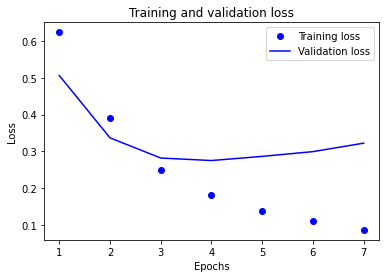

In [20]:
import matplotlib.pyplot as plt

plt.clf()
history_dict = history_otra.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

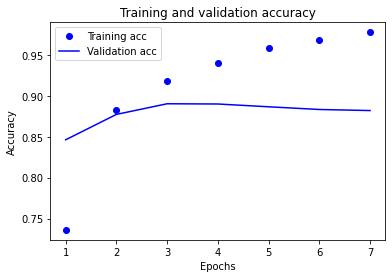

In [21]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, (len(history_dict['accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()